In [2]:
%matplotlib widget

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import decimate
from matplotlib.widgets import Slider, Button
from pandas import read_csv
from mumax_helper import * 
import matplotlib.animation as animation

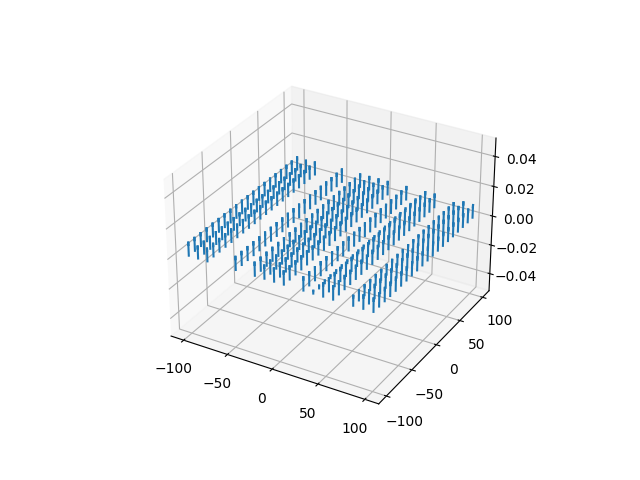

In [48]:
%matplotlib widget
ax = plt.figure().add_subplot(projection='3d')

num_points = 20

x = np.linspace(-100,100,num_points)
y = np.linspace(-100,100,num_points)
z = np.array([0])

Z,Y,X = np.meshgrid(z,y,x)

u = mz[0,:,:,:]
v = mz[1,:,:,:]
w = mz[2,:,:,:]

rand_x = np.random.choice(u.shape[1], num_points, replace=False)
rand_y = np.random.choice(u.shape[2], num_points, replace=False)

u = u[:,rand_x,rand_y]
v = v[:,rand_x,rand_y]
w = w[:,rand_x,rand_y]


mag = np.sqrt(u**2 + v**2 + w**2)

ax.quiver(X,Y,Z,u,v,w,length=.01,normalize=True)

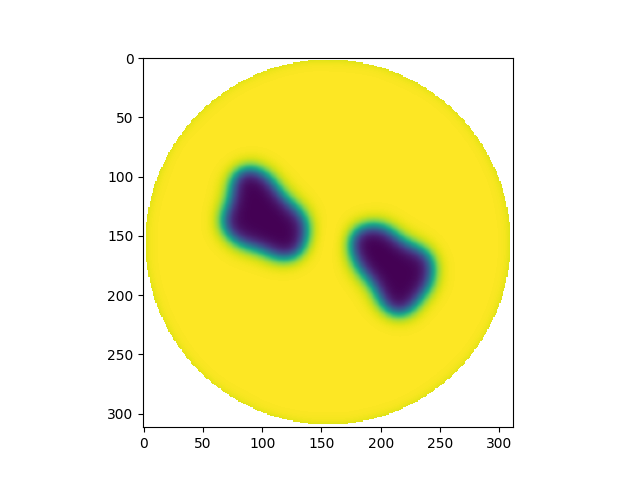

In [6]:
import matplotlib.animation as animation
from pandas import read_csv
from matplotlib.widgets import Slider, Button
from scipy.signal import decimate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import mpl_toolkits.axes_grid1
import matplotlib.widgets
from mumax_helper import *
%matplotlib widget


dir = r"Twin Skyrmions f=2157894736.842105.out"

arr = np.load(dir+"\m.npz")

table = read_mumax3_table(dir + "/table.txt")
time = table['t']

mx = [arr[key][0, :, :, :] for key in arr.keys()]
my = [arr[key][1, :, :, :] for key in arr.keys()]
mz = [arr[key][2, :, :, :] for key in arr.keys()]

# table['spatial_mx'] = mx
# table['spatial_my'] = my
# table['spatial_mz'] = mz

q_array = []
for x in range(len(mx)):

    m0x = mx[x]
    m0y = my[x]
    m0z = mz[x]

    dm0x_dx = np.diff(m0x, axis=1)[:, :, :-1]
    dm0y_dx = np.diff(m0y, axis=1)[:, :, :-1]
    dm0z_dx = np.diff(m0z, axis=1)[:, :, :-1]

    dm0x_dy = np.diff(m0x, axis=2)[:, :-1, :]
    dm0y_dy = np.diff(m0y, axis=2)[:, :-1, :]
    dm0z_dy = np.diff(m0z, axis=2)[:, :-1, :]

    dm0_dx = np.array([dm0x_dx, dm0y_dx, dm0z_dx])
    dm0_dy = np.array([dm0x_dy, dm0y_dy, dm0z_dy])
    cross_product = np.cross(dm0_dx, dm0_dy, axis=0)

    q_x = m0x[:, :-1, :-1] * cross_product[0]
    q_y = m0y[:, :-1, :-1] * cross_product[1]
    q_z = m0z[:, :-1, :-1] * cross_product[2]
    q = 1/(4*np.pi) * (q_x + q_y + q_z)
    q_array.append(q)

# table['Q'] = q_array

# times = table['# t (s)'].values


# using this class is as easy as using FuncAnimation:

# sp_mz = pd.read_pickle('data.pkl')

# Define initial parameters
init_index = 0
# title_first = "Time = "
# init_title = "Time: {:#.2g} (ns)".format(table['t'][init_index]/1e-9)

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
# plt.rc('font',family='serif')
# # line = ax.imshow(np.array(sp_mz['spatial_mz'].values[0][0],dtype=float), animated=True)
# ax.set_xlabel('nm')
# ax.set_ylabel('nm')

# plt.imshow(mz[0],extent=[0,200])

# ax.set_title(init_title)


mz = [[ax.imshow(arr[key][2, 0, :, :],animated=True)] for key in arr.keys()]

# im = ax.imshow(np.array(sp_mz['spatial_mz'].values[i][0],dtype=float), animated=True)
# updated_title = "Time: {:#.3g} (ns)".format(table['t'][i]/1e-9)
# title = ax.text(0.5,0.85, updated_title, bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
#             transform=ax.transAxes, ha="center")
# ims.append([im])

ani = animation.ArtistAnimation(fig, mz, interval=20, blit=True, repeat_delay=1000)
# point, = ax.plot([],[], marker="o", color="crimson", ms=15)

# def update(i):
#     line.set_data(table['spatial_z'][i][0])
#     updated_title = "Time: {:#.3g} (ns)".format(table['t'][i]/1e-9)
#     ax.set_title(updated_title)

# ani = Player(fig, update, interval=50, maxi=len(arr)-1,save_count=1250)

# ani.save('Zigzag PBC.mp4')

plt.show()
# plt.savefig('Twin Skyrmion Step 1.svg')


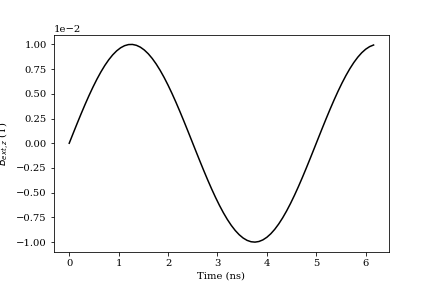

In [26]:
fig,ax = plt.subplots()
full_range = int(len(time)/16)
ax.plot(1e9*time[:full_range],table['B_extz'][:full_range],color='black')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (ns)')
plt.ylabel("$B_{ext,z}$ (T)")
plt.show()
plt.savefig('Bextz.svg')

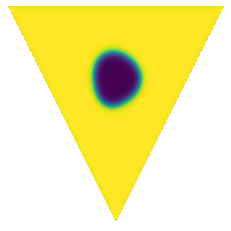

In [21]:
%matplotlib inline

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
plt.rc('font', family='serif')
# line = ax.imshow(np.array(sp_mz['spatial_mz'].values[0][0],dtype=float), animated=True)


full_range = len(time)/16
num_steps = 5

for x in range(num_steps):

    index = int(x * full_range / num_steps)
    # print(index)

    plt.imshow(mz[index][0,:,:], extent=[0, 200, 0, 200])
    plt.xlabel('nm')
    plt.ylabel('nm')
    plt.axis('off')
    # plt.show()
    plt.savefig(f"Triangle {x}.svg")


In [17]:
"{0:.6g}".format(5.5657188485)


'5.56572'

In [23]:
"Time: {:#.2g} (ns)".format(table['t'][5]/1e-9)

'Time: 0.40 (ns)'

In [9]:
import cv2
import sys

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')￼

if __name__ == '__main__':

    # Set up tracker.
    # Instead of MIL, you can also use

    tracker_types = ['BOOSTING', 'MIL', 'KCF', 'TLD',
                     'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
    tracker_type = tracker_types[2]

    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.TrackerBoosting_create()
        if tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        if tracker_type == 'KCF':
            tracker = cv2.TrackerKCF_create()
        if tracker_type == 'TLD':
            tracker = cv2.TrackerTLD_create()
        if tracker_type == 'MEDIANFLOW':
            tracker = cv2.TrackerMedianFlow_create()
        if tracker_type == 'GOTURN':
            tracker = cv2.TrackerGOTURN_create()
        if tracker_type == 'MOSSE':
            tracker = cv2.TrackerMOSSE_create()
        if tracker_type == "CSRT":
            tracker = cv2.TrackerCSRT_create()

    # Read video
    video = cv2.VideoCapture("videos/chaplin.mp4")

    # Exit if video not opened.
    if not video.isOpened():
        print "Could not open video"
        sys.exit()

    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print 'Cannot read video file'
        sys.exit()

    # Define an initial bounding box
    bbox = (287, 23, 86, 320)

    # Uncomment the line below to select a different bounding box
    bbox = cv2.selectROI(frame, False)

    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)

    while True:
        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break

        # Start timer
        timer = cv2.getTickCount()

        # Update tracker
        ok, bbox = tracker.update(frame)

        # Calculate Frames per second (FPS)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)
        else:
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

        # Display tracker type on frame
        cv2.putText(frame, tracker_type + " Tracker", (100, 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50, 170, 50), 2)

        # Display FPS on frame
        cv2.putText(frame, "FPS : " + str(int(fps)), (100, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50, 170, 50), 2)

        # Display result
        cv2.imshow("Tracking", frame)

        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break


SyntaxError: invalid character '￼' (U+FFFC) (41843928.py, line 4)